# Annual Water Usage in Baltimore

**Background** : The Dataset provides the annual water usage in Baltimore from 1885 to 1963, or 79 years of data.
The values are in the units of liters per capita per day, and there are 79 observations.


###Import Library

In [0]:
# scipy
import scipy as  sci
# numpy
import numpy as np
# matplotlib
import matplotlib as mpl
# statsmodels
import statsmodels as sml
# scikit-learn
import sklearn as skl
# pandas
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from matplotlib.pylab import rcParams

##Load Dataset

Load the dataset (water.csv) as a Pandas Series

In [2]:
df = pd.read_csv('Water (1).csv')
df.head()

,Year,Volume
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


Split Dataset into two :
* Model development with the named **dataset.csv** 
* Validation with the named **validation.csv**

In [3]:
len(df)

79

Total Dataset is 79, so we want to divide it use Pareto Chart with 70:30 portion
* 70% of Dataset for dataset.csv
* 30% of Dataset for validation.csv

In [4]:
split_point = len(df) - 24
dataset, validation = df[0:split_point], df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)

Dataset 55, Validation 24


##Summary of Dataset

### Dataset Content

In [5]:
df.head()

,Year,Volume
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [7]:
df.shape

(79, 2)

Dataset is contain of 79 rows of data with 2 features 
* **Year** and 
* **Water**  is values in the units of liters per capita per day os Water Usage in Baltimore

## Dataset Statistic

In [0]:
df.describe()

,Year,Water
count,79.000000,79.000000
mean,1924.000000,512.025316
std,22.949219,75.685072
min,1885.000000,344.000000
25%,1904.500000,462.000000
50%,1924.000000,503.000000
75%,1943.500000,581.000000
max,1963.000000,662.000000


- **Mean of the Year is 1924**, because the dataset is contain from 1885 (min) till 1963(max).

- Meanwhile the **mean of water usage is 512** units of liters per capita per day.

- The **minimum of water usage is 462** units of liters per capita per day.

- The **maximum of water usage is 662** units of liters per capita per day.

## Line Plot

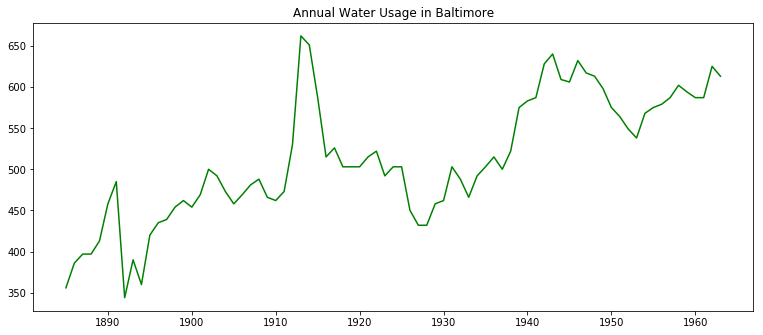

In [8]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_axes([0, 0, 1, 1])

ax1.set_title('Annual Water Usage in Baltimore')

ax1.plot(df['Year'],
         df['Volume'],
         color='green')
#plt.xticks(df['Year'],rotation=90,fontsize=7)

plt.show()

In [0]:
type(df['Year'])

pandas.core.series.Series

In [0]:
X_train, X_val, y_train, y_val = train_test_split(df['Year'], df['Water'], test_size=0.2, random_state=1)

##Model Evaluation

Model evaluation will only be performed on the data in dataset.csv prepared in the previous section.

###Performance Measure

We will evaluate the performance of predictions using the root mean squared error (RMSE). This will give more weight to predictions that are grossly wrong and will have the same units as the original data.

Any transforms to the data must be reversed before the RMSE is calculated and reported to make the performance between different methods directly comparable.

We can calculate the RMSE using the helper function from the scikit-learn library mean_squared_error() that calculates the mean squared error between a list of expected values (the test set) and the list of predictions. We can then take the square root of this value to give us a RMSE score.

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#dataset = Series.from_csv('dataset.csv')
#X = dataset.values.astype('float32')
#history = [x for x in X]
validation = Series.from_csv('validation.csv')
y_test = validation.values.astype('float32')
test = y_test

X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
history = [x for x in train]
predictions = list()
bias = 1.081624
for i in range(len(test)):
	# predict
	model = ARIMA(history, order=(2,1,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = bias + float(model_fit.forecast()[0])
	predictions.append(yhat)

#yhat = float(model_fit.forecast()[0])
#predictions = predictions.append(yhat)
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4141: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


RMSE: 84.569


In [0]:
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# predict
	model = ARIMA(history, order=(2,1,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = bias + float(model_fit.forecast()[0])
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

>Predicted=502.715, Expected=503
>Predicted=505.894, Expected=503
>Predicted=504.082, Expected=515
>Predicted=516.336, Expected=522
>Predicted=522.296, Expected=492
>Predicted=491.911, Expected=503
>Predicted=506.711, Expected=503
>Predicted=503.185, Expected=450
>Predicted=450.362, Expected=432
>Predicted=437.369, Expected=432
>Predicted=434.646, Expected=458
>Predicted=459.810, Expected=462
>Predicted=460.773, Expected=503
>Predicted=505.057, Expected=488
>Predicted=485.536, Expected=466
>Predicted=467.835, Expected=492
>Predicted=495.632, Expected=503
>Predicted=501.814, Expected=515
>Predicted=515.361, Expected=500
>Predicted=499.634, Expected=522
>Predicted=524.797, Expected=575
>Predicted=575.576, Expected=583
>Predicted=579.191, Expected=587
>Predicted=587.500, Expected=628
>Predicted=630.397, Expected=640
>Predicted=638.047, Expected=609
>Predicted=607.541, Expected=606
>Predicted=610.112, Expected=632
>Predicted=634.511, Expected=617
>Predicted=614.670, Expected=613
>Predicted

##Persistence
The first step before getting bogged down in data analysis and modeling is to establish a baseline of performance.

This will provide both a template for evaluating models using the proposed test harness and a performance measure by which all more elaborate predictive models can be compared.

The baseline prediction for time series forecasting is called the naive forecast, or persistence.

This is where the observation from the previous time step is used as the prediction for the observation at the next time step.

We can plug this directly into the test harness defined in the previous section.

In [0]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# predict
	yhat = history[-1]
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=503.000, Expected=503
>Predicted=503.000, Expected=503
>Predicted=503.000, Expected=515
>Predicted=515.000, Expected=522
>Predicted=522.000, Expected=492
>Predicted=492.000, Expected=503
>Predicted=503.000, Expected=503
>Predicted=503.000, Expected=450
>Predicted=450.000, Expected=432
>Predicted=432.000, Expected=432
>Predicted=432.000, Expected=458
>Predicted=458.000, Expected=462
>Predicted=462.000, Expected=503
>Predicted=503.000, Expected=488
>Predicted=488.000, Expected=466
>Predicted=466.000, Expected=492
>Predicted=492.000, Expected=503
>Predicted=503.000, Expected=515
>Predicted=515.000, Expected=500
>Predicted=500.000, Expected=522
>Predicted=522.000, Expected=575
>Predicted=575.000, Expected=583
>Predicted=583.000, Expected=587
>Predicted=587.000, Expected=628
>Predicted=628.000, Expected=640
>Predicted=640.000, Expected=609
>Predicted=609.000, Expected=606
>Predicted=606.000, Expected=632
>Predicted=632.000, Expected=617
>Predicted=617.000, Expected=613
>Predicted

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4141: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


#ARIMA MODELS

In this model, we will develop Autoregressive Integrated Moving Average or ARIMA models to solve this Time Series Problem on Water Usage of Annual Water Usage in Baltimore.
<br>
We will approach modeling by both manual and automatic configuration of the ARIMA model. This will be followed by a third step of investigating the residual errors of the chosen model.

As such, this section is broken down into 3 steps:

1. Manually Configure the ARIMA.
2. Automatically Configure the ARIMA.
3. Review Residual Errors.



##Manually Configured ARIMA

The ARIMA(p,d,q) model requires three parameters and is traditionally configured manually.

Analysis of the time series data assumes that we are working with a stationary time series.

The time series is likely non-stationary. We can make it stationary by first differencing the series and using a statistical test to confirm that the result is stationary.

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4141: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


ADF Statistic: -6.126719
p-value: 0.000000
Critical Values:
	1%: -3.534
	5%: -2.906
	10%: -2.591


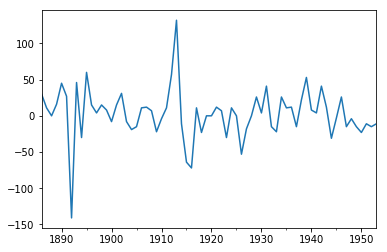

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


In [0]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
 
# create a differe
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return Series(diff)
 
series = Series.from_csv('dataset.csv')
X = series.values
X = X.astype('float32')
# difference data
stationary = difference(X)
stationary.index = series.index[1:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# plot differenced data
stationary.plot()
pyplot.show()
# save
stationary.to_csv('stationary.csv')

Running the example outputs the result of a statistical significance test of whether the differenced series is stationary. Specifically, the augmented Dickey-Fuller test.

The results show that the test statistic value -6.126719 is smaller than the critical value at 1% of -3.534. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

This suggests that at least one level of differencing is required. The d parameter in our ARIMA model should at least be a value of 1.

#### ACF and PACF

The next first step is to select the lag values for the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively.

We can do this by reviewing Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.

The example below creates ACF and PACF plots for the series.

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4141: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


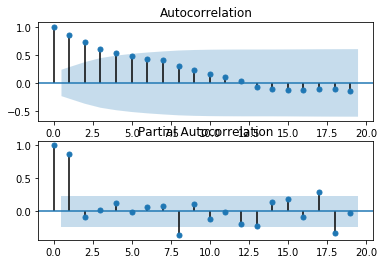

In [0]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
series = Series.from_csv('dataset.csv')
pyplot.figure()
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca())
pyplot.show()

Below are some observations from the plots.

- The ACF shows no significant lags.
- The PACF also shows no significant lags.

A good starting point for the p and q values is also 0.


In [0]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# predict
	model = ARIMA(history, order=(0,1,0))
	model_fit = model.fit(disp=0)
	yhat = model_fit.forecast()[0]
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=507.455, Expected=503
>Predicted=507.324, Expected=503
>Predicted=507.200, Expected=515
>Predicted=519.417, Expected=522
>Predicted=526.486, Expected=492
>Predicted=495.579, Expected=503
>Predicted=506.769, Expected=503
>Predicted=506.675, Expected=450
>Predicted=452.293, Expected=432
>Predicted=433.810, Expected=432
>Predicted=433.767, Expected=458
>Predicted=460.318, Expected=462
>Predicted=464.356, Expected=503
>Predicted=506.196, Expected=488
>Predicted=490.809, Expected=466
>Predicted=468.292, Expected=492
>Predicted=494.776, Expected=503
>Predicted=505.940, Expected=515
>Predicted=518.118, Expected=500
>Predicted=502.769, Expected=522
>Predicted=525.132, Expected=575
>Predicted=579.056, Expected=583
>Predicted=587.127, Expected=587
>Predicted=591.125, Expected=628
>Predicted=632.772, Expected=640
>Predicted=644.897, Expected=609
>Predicted=613.288, Expected=606
>Predicted=610.167, Expected=632
>Predicted=636.525, Expected=617
>Predicted=621.210, Expected=613
>Predicted

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4141: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


RMSE of 22.311, which is slightly higher than the persistence model above.

This may be because of the details of the ARIMA implementation, such as an automatic trend constant that is calculated and added.

##Grid Search ARIMA Hyperparameters

The ACF and PACF plots suggest that we cannot do better than a persistence model on this dataset.

To confirm this analysis, we can grid search a suite of ARIMA hyperparameters and check that no models result in better out of sample RMSE performance.

In this section, we will search values of p, d, and q for combinations (skipping those that fail to converge), and find the combination that results in the best performance. We will use a grid search to explore all combinations in a subset of integer values.

Specifically, we will search all combinations of the following parameters:

- p: 0 to 4.
- d: 0 to 2.
- q: 0 to 4.<br>
<br>
This is (5 * 3 * 5), or 300 potential runs of the test harness, and will take some time to execute.

We will also disable the automatic addition of a trend constant from the model by setting the ‘trend‘ argument to ‘nc‘ for no constant when calling fit().

In [0]:
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
 
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		# model_fit = model.fit(disp=0)
		model_fit = model.fit(trend='nc', disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s RMSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# load dataset
series = Series.from_csv('dataset.csv')
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4141: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


ARIMA(0, 0, 1) RMSE=282.656
ARIMA(0, 0, 4) RMSE=77.297
ARIMA(0, 1, 1) RMSE=21.907
ARIMA(0, 1, 2) RMSE=22.182
ARIMA(0, 1, 3) RMSE=24.733
ARIMA(0, 1, 4) RMSE=24.845
ARIMA(0, 2, 1) RMSE=22.381
ARIMA(0, 2, 2) RMSE=22.244
ARIMA(1, 0, 0) RMSE=22.084
ARIMA(1, 1, 0) RMSE=21.922
ARIMA(1, 2, 0) RMSE=27.464
ARIMA(1, 2, 1) RMSE=22.271
ARIMA(2, 0, 0) RMSE=22.676
ARIMA(2, 1, 0) RMSE=21.733
ARIMA(2, 2, 0) RMSE=25.282
ARIMA(3, 0, 0) RMSE=21.962
ARIMA(3, 1, 0) RMSE=24.270
ARIMA(3, 1, 1) RMSE=25.491
ARIMA(3, 2, 0) RMSE=25.625
ARIMA(3, 2, 1) RMSE=25.008
ARIMA(4, 0, 0) RMSE=24.923
ARIMA(4, 1, 0) RMSE=24.802
ARIMA(4, 1, 1) RMSE=25.103
ARIMA(4, 1, 2) RMSE=24.630
ARIMA(4, 2, 0) RMSE=27.089
ARIMA(4, 2, 1) RMSE=25.932
ARIMA(4, 2, 2) RMSE=25.419
Best ARIMA(2, 1, 0) RMSE=21.733


Running the example runs through all combinations and reports the results on those that converge without error. The example takes a little over 2 minutes to run on modern hardware.

The results show that the best configuration discovered was ARIMA(2, 1, 0) with an RMSE of 21.733, slightly lower than the manual persistence model tested earlier, but may or may not be significantly different.

**We will select this ARIMA(2, 1, 0) model going forward.**

##Review Residuals Error

A good final check of a model is to review residual forecast errors.

Ideally, the distribution of residual errors should be a Gaussian with a zero mean.

We can check this by using summary statistics and plots to investigate the residual errors from the ARIMA(2, 1, 0) model. The example below calculates and summarizes the residual forecast errors.

Running the example first describes the distribution of the residuals.

We can see that the distribution has a right shift and that the mean is non-zero at 1.081624.

This is perhaps a sign that the predictions are biased.

The distribution of residual errors is also plotted.

The graphs suggest a Gaussian-like distribution with a longer right tail, providing further evidence that perhaps a power transform might be worth exploring.

               0
count  35.000000
mean    1.081625
std    22.022566
min   -52.103811
25%   -16.202280
50%    -0.459805
75%    12.085093
max    51.284333


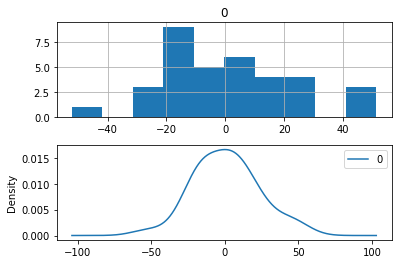

In [0]:
from pandas import Series
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
from matplotlib import pyplot
# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# predict
	model = ARIMA(history, order=(2,1,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

We could use this information to bias-correct predictions by adding the mean residual error of 1.081624 to each forecast made.

The performance of the predictions is improved very slightly from 21.733 to 21.706, which may or may not be significant.

The summary of the forecast residual errors shows that the mean was indeed moved to a value very close to zero.

Finally, density plots of the residual error do show a small shift towards zero.

RMSE: 21.706
                  0
count  3.500000e+01
mean   6.256219e-07
std    2.202257e+01
min   -5.318544e+01
25%   -1.728390e+01
50%   -1.541429e+00
75%    1.100347e+01
max    5.020271e+01


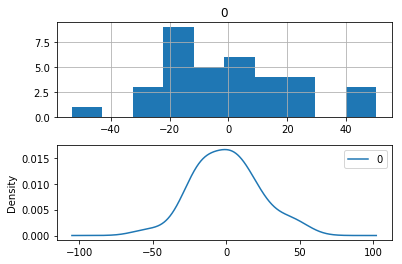

In [0]:
from pandas import Series
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
from matplotlib import pyplot
# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = 1.081624
for i in range(len(test)):
	# predict
	model = ARIMA(history, order=(2,1,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = bias + float(model_fit.forecast()[0])
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
# summarise residual errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot residual errors
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

It is debatable whether this bias correction is worth it, but we will use it for now.

## Model Validation

After models have been developed and a final model selected, it must be validated and finalized.

Validation is an optional part of the process, but one that provides a ‘last check’ to ensure we have not fooled or misled ourselves.

This section includes the following steps:

1. Finalize Model: Train and save the final model.
2. Make Prediction: Load the finalized model and make a prediction.
3. Validate Model: Load and validate the final model.

### Finalize Model

Finalizing the model involves fitting an ARIMA model on the entire dataset, in this case, on a transformed version of the entire dataset.

Once fit, the model can be saved to file for later use.

The example below trains an ARIMA(2,1,0) model on the dataset and saves the whole fit object and the bias to file.

In [0]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
import numpy
 
# monkey patch around bug in ARIMA class
def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
 
ARIMA.__getnewargs__ = __getnewargs__
 
# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
# fit model
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual
bias = 1.081624
# save model
model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])

- model.pkl This is the ARIMAResult object from the call to ARIMA.fit(). This includes the coefficients and all other internal data returned when fitting the model.
- model_bias.npy This is the bias value stored as a one-row, one-column NumPy array.

### Make Prediction
A natural case may be to load the model and make a single forecast.

This is relatively straightforward and involves restoring the saved model and the bias and calling the forecast() function.

In [0]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMAResults
import numpy
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
yhat = bias + float(model_fit.forecast()[0])
print('Predicted: %.3f' % yhat)

Predicted: 540.013


If we peek inside validation.csv, we can see that the value on the first row for the next time period is 568. The prediction is in the right ballpark.

### Validate Model
We can load the model and use it in a pretend operational manner.

In the test harness section, we saved the final 10 years of the original dataset in a separate file to validate the final model.

We can load this validation.csv file now and use it to see how well our model really is on “unseen” data.

There are two ways we might proceed:

Load the model and use it to forecast the next 10 years. The forecast beyond the first one or two years will quickly start to degrade in skill.
Load the model and use it in a rolling-forecast manner, updating the transform and model for each time step. This is the preferred method as it is how one would use this model in practice as it would achieve the best performance.
As with model evaluation in the previous sections, we will make predictions in a rolling-forecast manner. This means that we will step over lead times in the validation dataset and take the observations as an update to the history.

>Predicted=540.013, Expected=568
>Predicted=571.589, Expected=575
>Predicted=573.289, Expected=579
>Predicted=579.561, Expected=587
>Predicted=588.063, Expected=602
>Predicted=603.022, Expected=594
>Predicted=593.178, Expected=587
>Predicted=588.558, Expected=587
>Predicted=588.797, Expected=625
>Predicted=627.941, Expected=613
RMSE: 16.532


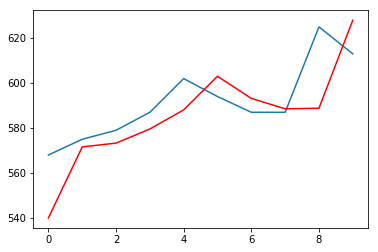

In [0]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
# load and prepare datasets
dataset = Series.from_csv('dataset.csv')
X = dataset.values.astype('float32')
history = [x for x in X]
validation = Series.from_csv('validation.csv')
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = bias + float(model_fit.forecast()[0])
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
	# predict
	model = ARIMA(history, order=(2,1,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = bias + float(model_fit.forecast()[0])
	predictions.append(yhat)
	# observation
	obs = y[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()

Running the example prints each prediction and expected value for the time steps in the validation dataset.

The final RMSE for the validation period is predicted at 16 liters per capita per day. This is not too different from the expected error of 21, but I would expect that it is also not too different from a simple persistence model.

A plot of the predictions compared to the validation dataset is also provided.

The forecast does have the characteristics of a persistence forecast. This suggests that although this time series does have an obvious trend, it is still a reasonably difficult problem.


## Summary

We covered a lot of ground in this tutorial; specifically:

- How to develop a test harness with a performance measure and evaluation method and how to quickly develop a baseline forecast and skill.
- How to use time series analysis to raise ideas for how to best model the forecast problem.
- How to develop an ARIMA model, save it, and later load it to make predictions on new data.